<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [19]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [20]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [21]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [22]:
#Calculamos el numero total de la población "n"
Mexico['host_response_rate']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: host_response_rate
Non-Null Count  Dtype 
--------------  ----- 
21715 non-null  object
dtypes: object(1)
memory usage: 206.4+ KB


In [23]:
Mexico['host_response_rate'] = pd.to_numeric(
    Mexico['host_response_rate'].astype(str).str.replace('%', ''),
    errors='coerce'
)

In [24]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['host_response_rate'].max()
Min=Mexico['host_response_rate'].min()
Limites= [Min, Max]
Limites

[0.0, 100.0]

In [9]:
#Calculamos el rango R
R=Max-Min
R

100.0

In [25]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [10]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

6.377640644157816

**Creación de Categorias a partir de clases**

In [26]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 100.1, 16)
intervalos

array([-1.000e-01,  6.580e+00,  1.326e+01,  1.994e+01,  2.662e+01,
        3.330e+01,  3.998e+01,  4.666e+01,  5.334e+01,  6.002e+01,
        6.670e+01,  7.338e+01,  8.006e+01,  8.674e+01,  9.342e+01,
        1.001e+02])

In [27]:
#Creamos las categorías 
categorias= ["Categoría1 (0-6.6 host_response_rate)", "Categoría2 (6.7-1.4 host_response_rate)","Categoría3 (1.5-2 host_response_rate)", "Categoría4 (2.1-2.7 host_response_rate)",
             "Categoría5 (2.8-3.4 host_response_rate)", "Categoría6 (3.5-4 host_response_rate)","Categoría7 (4.1-5.4 host_response_rate)", "Categoría8 (5.5-6.1 host_response_rate)", "Categoría9 (6.2-6.7 host_response_rate)", "Categoría10 (6.8-7.4 host_response_rate)","Categoría11 (7.5-8.1 host_response_rate)", "Categoría12 (8.2-8.7 host_response_rate)",
             "Categoría13 (8.8-9.4 host_response_rate)", "Categoría14 (9.5-1.1 host_response_rate)","Categoría15 (1.2 host_response_rate)"
             ]

In [28]:
#Finalmente creamos las categorías en la columna numérica
Mexico['host_response_rate']=pd.cut(x= Mexico['host_response_rate'], bins=intervalos, labels= categorias)
Mexico['host_response_rate']

0                                         NaN
1        Categoría15 (1.2 host_response_rate)
2        Categoría15 (1.2 host_response_rate)
3        Categoría15 (1.2 host_response_rate)
4        Categoría15 (1.2 host_response_rate)
                         ...                 
26396    Categoría15 (1.2 host_response_rate)
26397    Categoría15 (1.2 host_response_rate)
26398    Categoría15 (1.2 host_response_rate)
26399    Categoría15 (1.2 host_response_rate)
26400                                     NaN
Name: host_response_rate, Length: 26401, dtype: category
Categories (15, object): ['Categoría1 (0-6.6 host_response_rate)' < 'Categoría2 (6.7-1.4 host_response_rate)' < 'Categoría3 (1.5-2 host_response_rate)' < 'Categoría4 (2.1-2.7 host_response_rate)' ... 'Categoría12 (8.2-8.7 host_response_rate)' < 'Categoría13 (8.8-9.4 host_response_rate)' < 'Categoría14 (9.5-1.1 host_response_rate)' < 'Categoría15 (1.2 host_response_rate)']

In [29]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['host_response_rate'].value_counts().reset_index()
Tabla_freq

host_response_rate  count
0       Categoría15 (1.2 host_response_rate)  18928
1   Categoría14 (9.5-1.1 host_response_rate)    915
2      Categoría1 (0-6.6 host_response_rate)    649
3   Categoría12 (8.2-8.7 host_response_rate)    381
4   Categoría13 (8.8-9.4 host_response_rate)    176
5   Categoría11 (7.5-8.1 host_response_rate)    158
6    Categoría8 (5.5-6.1 host_response_rate)    130
7    Categoría9 (6.2-6.7 host_response_rate)    102
8    Categoría2 (6.7-1.4 host_response_rate)     85
9    Categoría5 (2.8-3.4 host_response_rate)     62
10   Categoría4 (2.1-2.7 host_response_rate)     57
11   Categoría7 (4.1-5.4 host_response_rate)     29
12     Categoría6 (3.5-4 host_response_rate)     17
13  Categoría10 (6.8-7.4 host_response_rate)     14
14     Categoría3 (1.5-2 host_response_rate)     12

In [30]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

host_response_rate  count
0       Categoría15 (1.2 host_response_rate)  18928
1   Categoría14 (9.5-1.1 host_response_rate)    915
2      Categoría1 (0-6.6 host_response_rate)    649
3   Categoría12 (8.2-8.7 host_response_rate)    381
4   Categoría13 (8.8-9.4 host_response_rate)    176
5   Categoría11 (7.5-8.1 host_response_rate)    158
6    Categoría8 (5.5-6.1 host_response_rate)    130
7    Categoría9 (6.2-6.7 host_response_rate)    102
8    Categoría2 (6.7-1.4 host_response_rate)     85
9    Categoría5 (2.8-3.4 host_response_rate)     62
10   Categoría4 (2.1-2.7 host_response_rate)     57
11   Categoría7 (4.1-5.4 host_response_rate)     29
12     Categoría6 (3.5-4 host_response_rate)     17
13  Categoría10 (6.8-7.4 host_response_rate)     14
14     Categoría3 (1.5-2 host_response_rate)     12

In [31]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('host_response_rate')
Filtro_index

count
host_response_rate                             
Categoría15 (1.2 host_response_rate)      18928
Categoría14 (9.5-1.1 host_response_rate)    915
Categoría1 (0-6.6 host_response_rate)       649
Categoría12 (8.2-8.7 host_response_rate)    381
Categoría13 (8.8-9.4 host_response_rate)    176
Categoría11 (7.5-8.1 host_response_rate)    158
Categoría8 (5.5-6.1 host_response_rate)     130
Categoría9 (6.2-6.7 host_response_rate)     102
Categoría2 (6.7-1.4 host_response_rate)      85
Categoría5 (2.8-3.4 host_response_rate)      62
Categoría4 (2.1-2.7 host_response_rate)      57
Categoría7 (4.1-5.4 host_response_rate)      29
Categoría6 (3.5-4 host_response_rate)        17
Categoría10 (6.8-7.4 host_response_rate)     14
Categoría3 (1.5-2 host_response_rate)        12

Text(0, 0.5, 'Frecuencia')

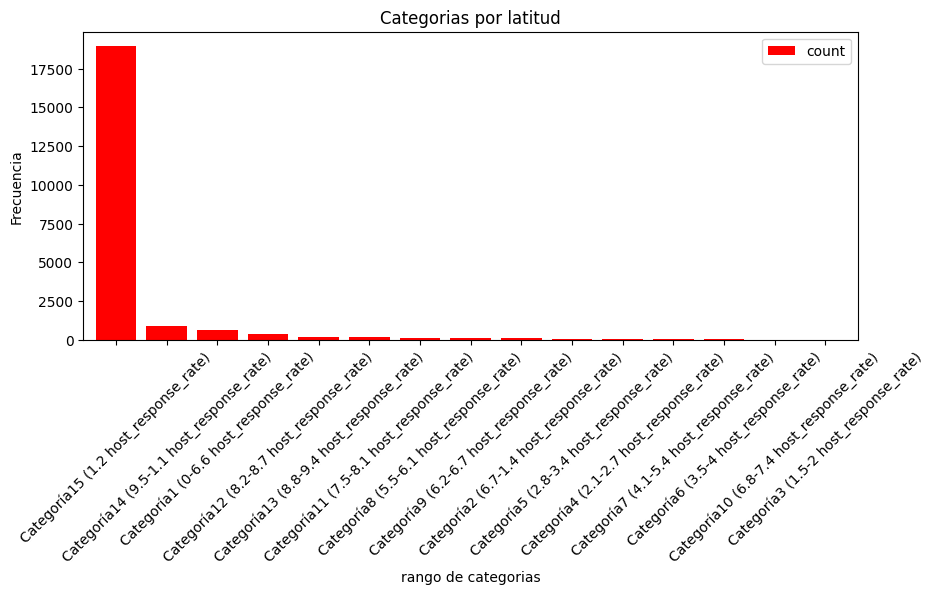

In [32]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')